In [1]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1536,1541,1544,1548,1554,1554,1556,1558,1574,1577
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,518,527,532,536,543,549,557,559,571,579
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,286,289,291,296,299,300,303,307,308,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,489,493,501,504,508,511,512,515,521,533
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,600,601,601,601,601,602,602,602,605,605
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,349,349,349,349,349,349,349,349,349,350


In [3]:
df_interest = df.loc[
                df['Country/Region'].isin(['United Kingdom','US', 'Italy', 'Germany'])
                & df['Province/State'].isna()]
df_interest.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
130,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,10513,10669,10717,10949,11110,11240,11306,11372,11408,11781
149,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,38826,39059,39412,39764,40192,40638,41063,41394,41750,42330
244,NaN,US,40.000000,-100.000000,0,0,0,0,0,0,...,231216,231714,232850,233954,235127,236281,237317,237779,238251,239671
258,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,46717,46853,47250,47742,48120,48475,48888,49044,49238,49770


In [4]:
df1 = df_interest.transpose()
df1.head(20)

,130,149,244,258
Province/State,NaN,NaN,NaN,NaN
Country/Region,Germany,Italy,US,United Kingdom
Lat,51.1657,41.8719,40,55.3781
Long,10.4515,12.5674,-100,-3.436
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0
1/27/20,0,0,0,0


In [5]:
df1 = df1.drop(['Province/State','Country/Region', 'Lat','Long'])
df1

,130,149,244,258
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0
...,...,...,...,...
11/6/20,11240,40638,236281,48475
11/7/20,11306,41063,237317,48888
11/8/20,11372,41394,237779,49044
11/9/20,11408,41750,238251,49238


In [8]:
df1.rename(columns = {'130':'Code-Name',  
                       'Weight':'Weight in kgs'},  
            inplace = True) 
df1.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

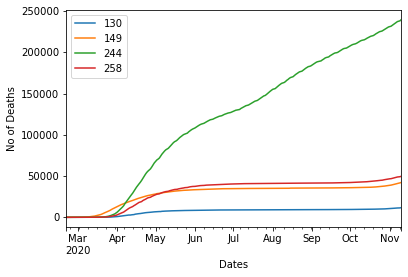

In [7]:
from matplotlib import pyplot
df1.plot()
pyplot.xlabel('Dates')
pyplot.ylabel('No of Deaths')
pyplot.show()

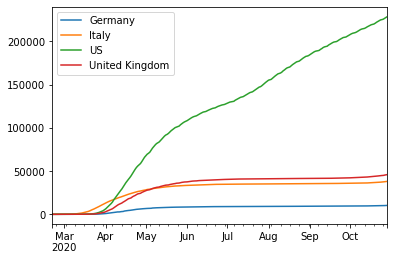

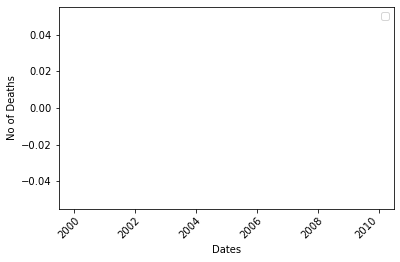

In [33]:
#animated
import numpy as np
import matplotlib.pyplot as plt
df1.plot()
color = ['red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

In [34]:
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

In [37]:
fig = plt.figure()
bar = 'vertical'
def buildmebarchart(i=int):
    iv = min(i, len(df1.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = df1.max().index
    y_pos = np.arange(len(objects))
    performance = df1.iloc[[iv]].values.tolist()[0]
    if bar == 'vertical':
        plt.bar(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.xticks(y_pos, objects)
        plt.ylabel('Deaths')
        plt.xlabel('Countries')
        plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))
    else:
        plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.yticks(y_pos, objects)
        plt.xlabel('Deaths')
        plt.ylabel('Countries')
animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
plt.show()

<Figure size 432x288 with 0 Axes>